
#Linear Regression with Python

Problem Statement:

Your neighbor is a school teacher and wants some help predicting the scores of her students. She believes that factors such as the number of absence days, the time spent on self-study, participation in extracurricular activities, and whether the student has a part-time job might influence their academic performance. She has asked if you could create a model that predicts a student’s score based on these features.

You decide that Linear Regression might be a good approach to solve this problem, and your neighbor provides you with a dataset containing information about a group of students.

Dataset Information:

The dataset student-scores.csv contains the following columns:

	•	Id: Unique identifier for each student.
	•	First Name
	•	Last Name
	•	Email Id
	•	Gender
	•	Part-Time Job: Whether the student is working on a part-time basis.
	•	Absence Days: Number of days the student failed to attend class.
	•	Extracurricular Activities: Whether the student is engaged in activities
    other than study.
	•	Weekly Self-Study Hours: Hours devoted by the student to self-study per    week.
	•	Career Aspiration: Example: Lawyer, Doctor, etc.
	•	Scores: Marks scored by the student in different subjects.

Objective:

Your goal is to build a linear regression model that can predict a student’s score based on the features provided in the dataset.

Source for Dataset:
https://www.kaggle.com/markmedhat

### Installing Dependencies


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import r2_score

### Reading our CSV data file and Data Preprocessing

In [51]:
ss = pd.read_csv('/content/student-scores.csv')


In [52]:
ss.shape #to check shape of our dataset

(2000, 17)

In [53]:
ss.head() #to get first 5 rows of our dataset

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [54]:
ss.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [55]:
ss.dtypes

,0
id,int64
first_name,object
last_name,object
email,object
gender,object
part_time_job,bool
absence_days,int64
extracurricular_activities,bool
weekly_self_study_hours,int64
career_aspiration,object


we want to create a model which can predict the total score based on parameters such as number of absence days, the time spent on self-study, participation in extracurricular activities

So parameter such as 'id' , 'first_name',	'last_name', 'email' can be droppped from the dataframe

In [56]:
ss = ss.drop(['id' , 'first_name', 'last_name', 'email'] , axis =1 )
ss.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


Summing up all the scores and storing them under the coloumn 'Total Marks'

In [57]:
ss['TOTAL_MARK'] = (ss['math_score']+ss['history_score']+ss['physics_score']+ss['chemistry_score']+ss['biology_score']+ss['english_score']+ss['geography_score']) / 7
ss.drop(['math_score',	'history_score',	'physics_score',	'chemistry_score',	'biology_score',	'english_score',	'geography_score'] , axis=1, inplace = True)
ss.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,male,False,3,False,27,Lawyer,82.000000
1,female,False,2,False,47,Doctor,91.428571
2,female,False,9,True,13,Government Officer,86.428571
3,female,False,5,False,3,Artist,78.714286
4,male,False,5,False,10,Unknown,74.428571


In [58]:
# checking if there are any missing values in our dataset
ss.isnull().sum()

,0
gender,0
part_time_job,0
absence_days,0
extracurricular_activities,0
weekly_self_study_hours,0
career_aspiration,0
TOTAL_MARK,0


**Encoding**: In machine learning, features that are categorical (like True/False values) often need to be converted into a numerical format before being fed into a model, as most machine learning algorithms work better with numerical data. This process is known as encoding.

**One-Hot-Encoding**: One-hot encoding is a technique used in machine learning to convert categorical data into a numerical format

In [59]:
ss['career_aspiration'].value_counts()

,count
career_aspiration,
Software Engineer,315
Business Owner,309
Unknown,223
Banker,169
Lawyer,138
Accountant,126
Doctor,119
Real Estate Developer,83
Stock Investor,73


<Axes: xlabel='career_aspiration'>

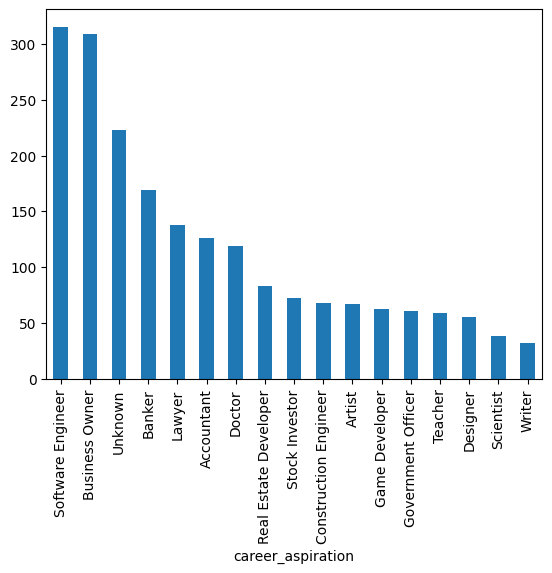

In [60]:
# visualzing the Counts of each Carrier Aspiration
ss['career_aspiration'].value_counts().plot(kind='bar')


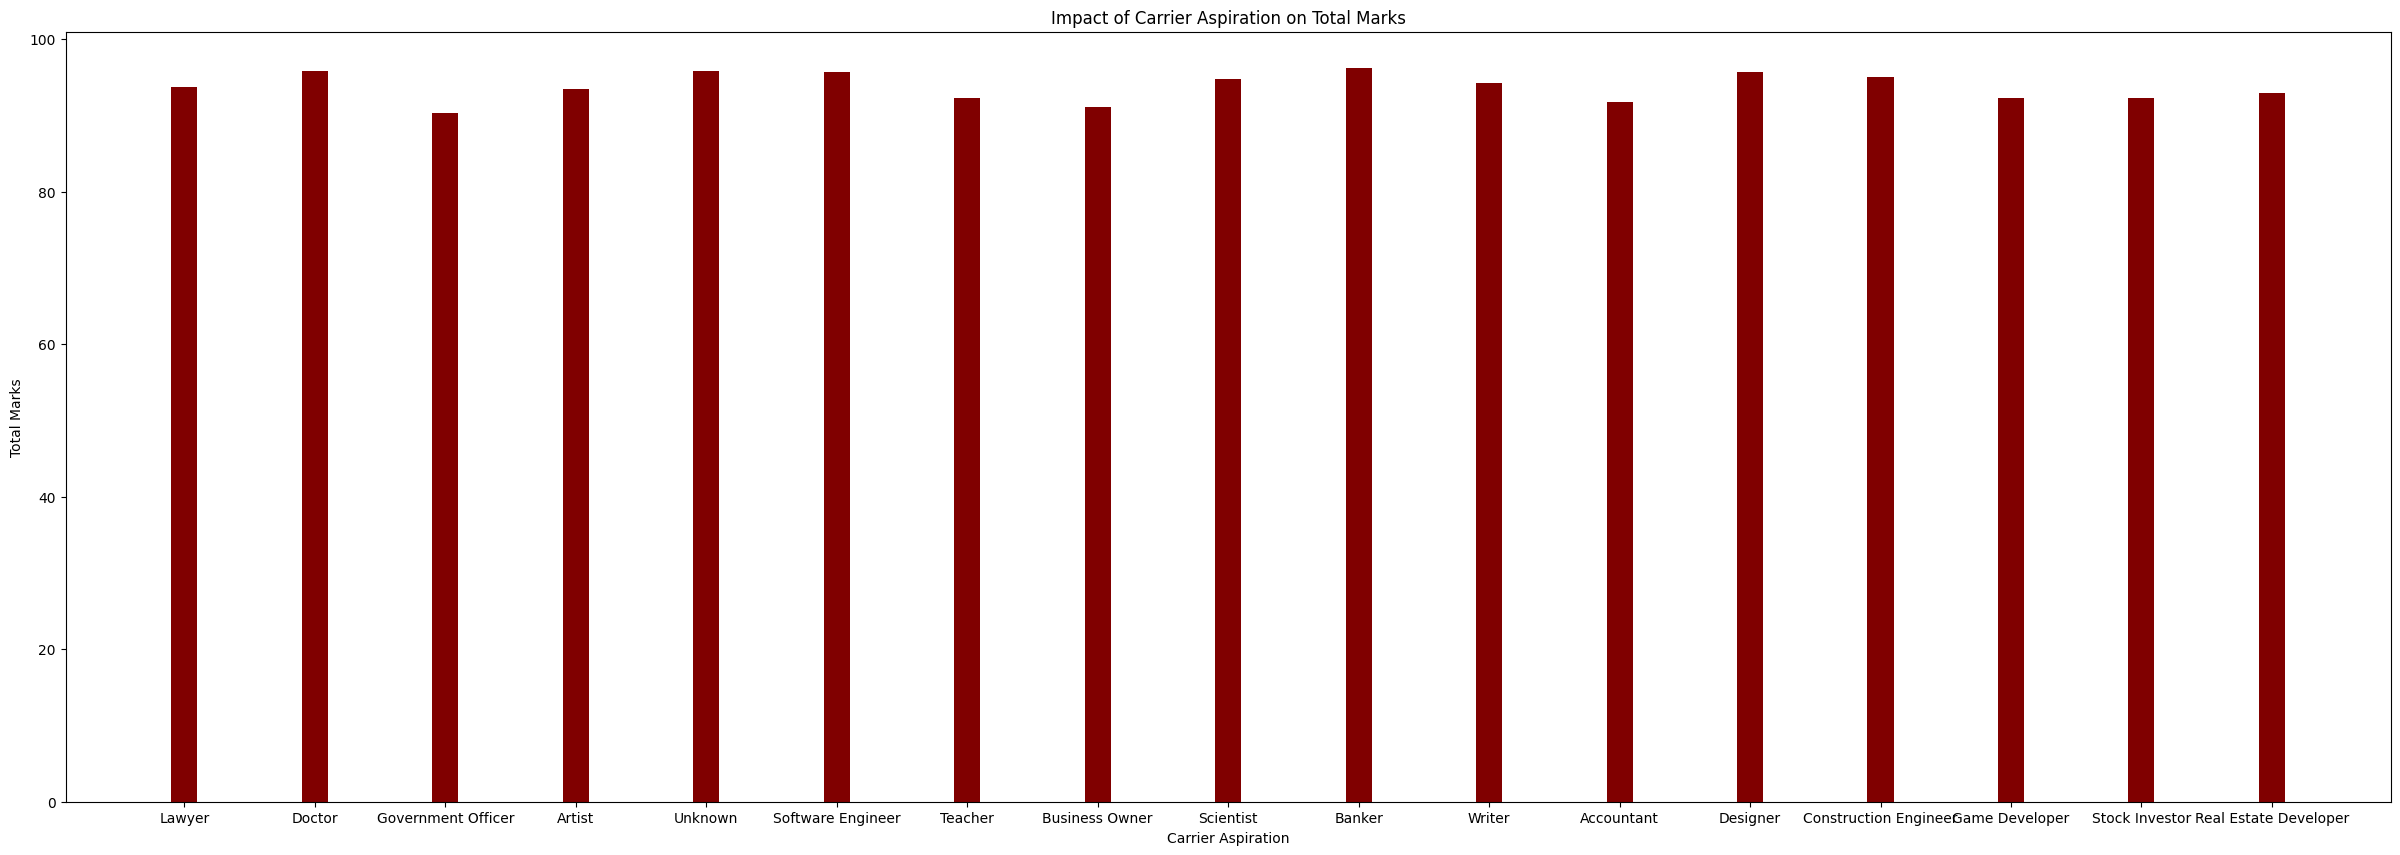

In [61]:
# visualizing the importance of carrier_aspirartion on the score using a simple Bar Graph
fig = plt.figure(figsize = (30, 10))

# creating the bar plot
plt.bar(ss['career_aspiration'], ss['TOTAL_MARK'], color ='maroon',
        width = 0.2)

plt.xlabel("Carrier Aspiration")
plt.ylabel("Total Marks")
plt.title("Impact of Carrier Aspiration on Total Marks")
plt.show()

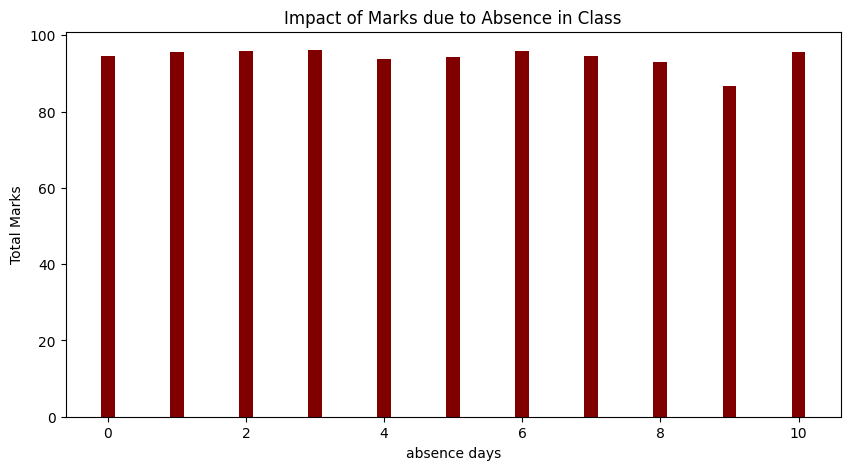

In [62]:
# Gender VS Marks
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ss['absence_days'], ss['TOTAL_MARK'], color ='maroon',
        width = 0.2)

plt.xlabel("absence days")
plt.ylabel("Total Marks")
plt.title("Impact of Marks due to Absence in Class")
plt.show()


True --> 1

False --> 0

Male --> 1

Female --> 0

In [63]:
ss['gender'].replace({ 'male' : 1 , 'female' : 0} , inplace = True)
ss['part_time_job'] = ss['part_time_job'].astype(int)
ss['extracurricular_activities'] = ss['extracurricular_activities'].astype(int)
ss.head()



,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,1,0,3,0,27,Lawyer,82.000000
1,0,0,2,0,47,Doctor,91.428571
2,0,0,9,1,13,Government Officer,86.428571
3,0,0,5,0,3,Artist,78.714286
4,1,0,5,0,10,Unknown,74.428571


In [64]:
# similarly we'll let a module 'LabelEncoder' to encode the column 'career_aspiration'
labelencoder = LabelEncoder()
ss['career_aspiration'] = labelencoder.fit_transform(ss['career_aspiration'])
ss.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,1,0,3,0,27,9,82.000000
1,0,0,2,0,47,6,91.428571
2,0,0,9,1,13,8,86.428571
3,0,0,5,0,3,1,78.714286
4,1,0,5,0,10,15,74.428571


<ipython-input-65-77aaa43d5698>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = ss.groupby('hour_group')['TOTAL_MARK'].mean().reset_index()


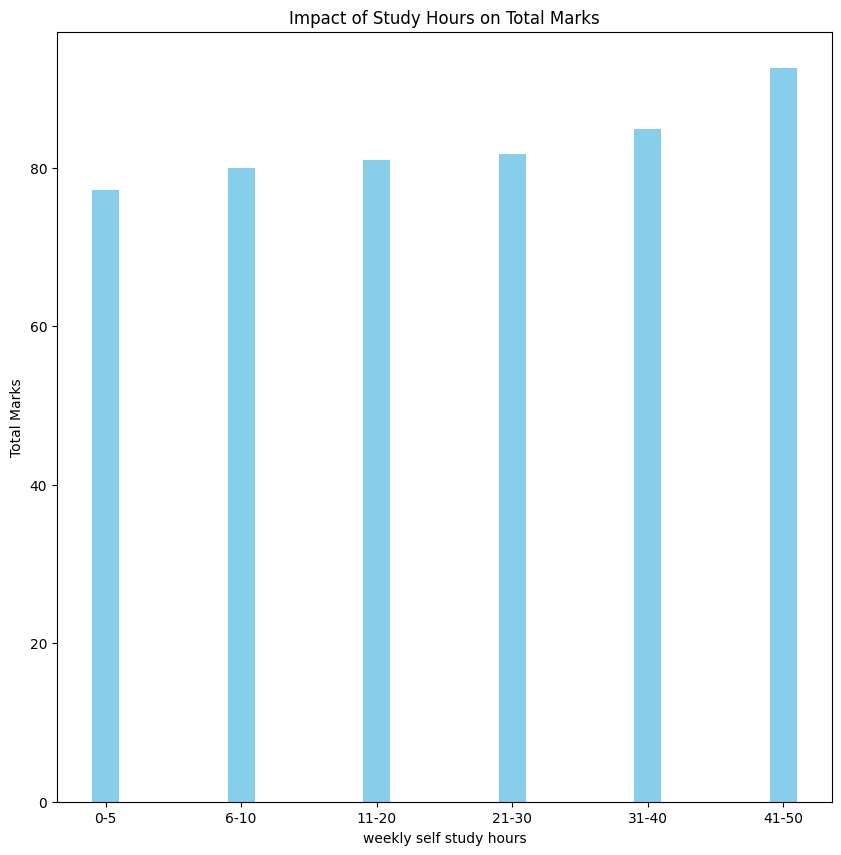

In [65]:
# visualizing the importance of Weekly Self Study Hours on the score using a simple Bar Graph
bins = [0, 5, 10, 20, 30, 40, 50]
labels = ['0-5', '6-10', '11-20', '21-30', '31-40', '41-50']
ss['hour_group'] = pd.cut(ss['weekly_self_study_hours'], bins=bins, labels=labels)
grouped_data = ss.groupby('hour_group')['TOTAL_MARK'].mean().reset_index()


fig = plt.figure(figsize = (10, 10))

plt.bar(grouped_data.index, grouped_data['TOTAL_MARK'], color ='skyblue',width = 0.2)
# Set the x-tick labels to the hour group labels
plt.xticks(grouped_data.index, grouped_data['hour_group'])


plt.xlabel("weekly self study hours")
plt.ylabel("Total Marks")
plt.title("Impact of Study Hours on Total Marks")
plt.show()

In [66]:
for i, category in enumerate(labelencoder.classes_):
    print(f'{category}: {i}')

Accountant: 0
Artist: 1
Banker: 2
Business Owner: 3
Construction Engineer: 4
Designer: 5
Doctor: 6
Game Developer: 7
Government Officer: 8
Lawyer: 9
Real Estate Developer: 10
Scientist: 11
Software Engineer: 12
Stock Investor: 13
Teacher: 14
Unknown: 15
Writer: 16


In [67]:
ss.drop(['hour_group'] , axis =1, inplace = True)

<Axes: >

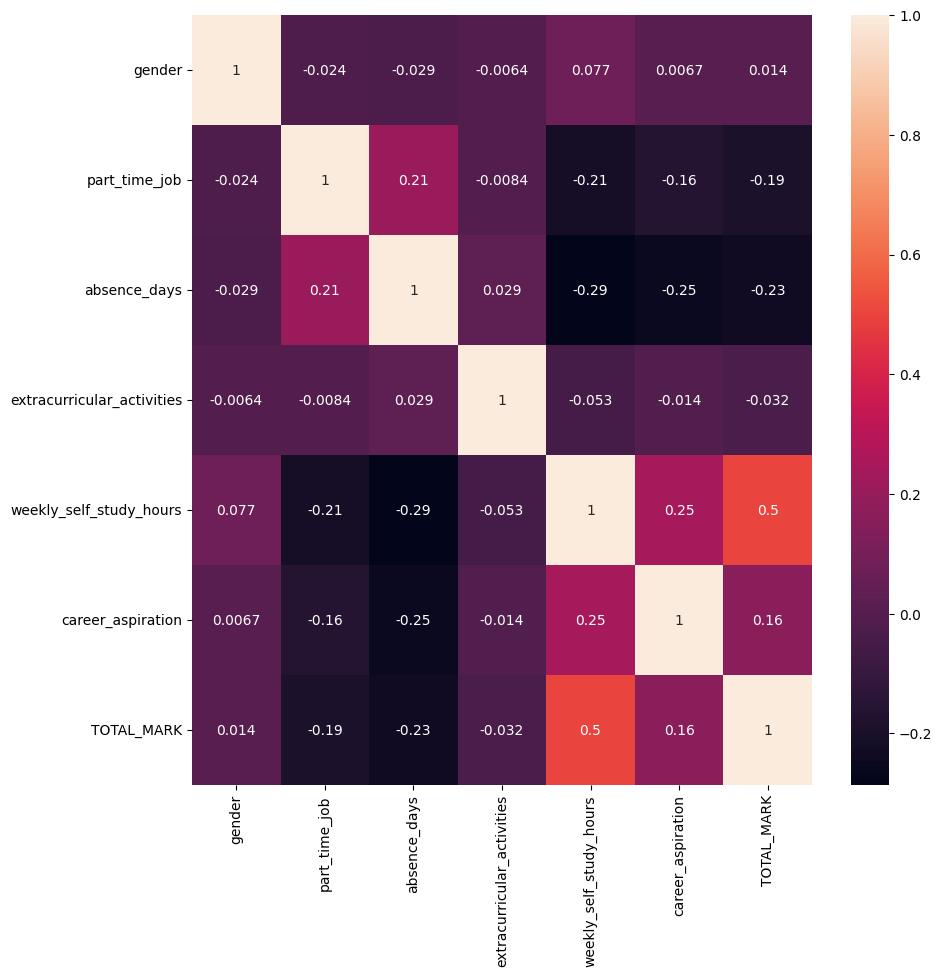

In [68]:
corr = ss.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr , annot = True)

In [69]:
ss['weekly_self_study_hours'].value_counts()

,count
weekly_self_study_hours,
3,102
4,102
5,94
1,89
2,89
0,70
31,70
24,66
32,65


In [70]:
ss.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,1,0,3,0,27,9,82.000000
1,0,0,2,0,47,6,91.428571
2,0,0,9,1,13,8,86.428571
3,0,0,5,0,3,1,78.714286
4,1,0,5,0,10,15,74.428571


### Model Training


spliting our data into train and test set





In [71]:
x = ss.drop(['TOTAL_MARK'] , axis = 1)
y = ss['TOTAL_MARK']

In [72]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [73]:
print(f"shape of x  is {x.shape}" )
print(f"shape of y  is {y.shape}" )

print(f"shape of x_train is {x_train.shape}" )
print(f"shape of y_train is {y_train.shape}" )
print(f"shape of x_test is {x_test.shape}" )
print(f"shape of y_test is {y_test.shape}" )



shape of x  is (2000, 6)
shape of y  is (2000,)
shape of x_train is (1600, 6)
shape of y_train is (1600,)
shape of x_test is (400, 6)
shape of y_test is (400,)


Training our data on training set


In [74]:
ss.isnull().sum()

,0
gender,0
part_time_job,0
absence_days,0
extracurricular_activities,0
weekly_self_study_hours,0
career_aspiration,0
TOTAL_MARK,0


In [75]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [76]:
# Model Evaluation
# prediction on training data
training_data_pred = lr.predict(x_train)

In [77]:
print(lr.intercept_)
print(lr.coef_)

77.65817759597572
[-0.32155703 -0.97030085 -0.16481613 -0.3342276   0.2277856   0.03002007]


Text(0.5, 1.0, 'Actual Marks VS Predicted Marks')

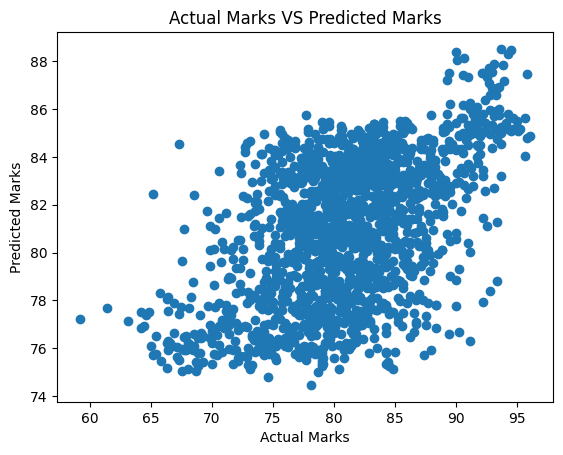

In [78]:
# Visualising actual and predicted Marks
plt.scatter(y_train , training_data_pred)
plt.xlabel('Actual Marks')
plt.ylabel("Predicted Marks")
plt.title('Actual Marks VS Predicted Marks')

In [79]:
# checking for test data
lr.fit(x_test , y_test)


LinearRegression()

In [80]:
test_data_pred = lr.predict(x_test)

Text(0.5, 1.0, 'Actual Marks VS Predicted Marks on Test Data')

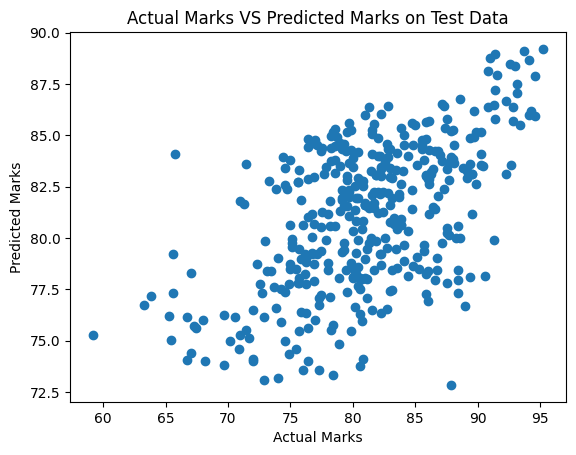

In [81]:
plt.scatter(y_test , test_data_pred)
plt.xlabel('Actual Marks')
plt.ylabel("Predicted Marks")
plt.title('Actual Marks VS Predicted Marks on Test Data')

In [ ]:
# r2_score_train = r2_score(y_train , training_data_pred)
# r2_score_test = r2_score(y_test , test_data_pred)
# print("R2 score for training data : " , r2_score_train)
# print("R2 score for test data : " , r2_score_test)


### Creating a Predictive System

In [99]:
import random
ss.iloc[random.randint(0,2000)]

,46
gender,0.0
part_time_job,0.0
absence_days,5.0
extracurricular_activities,1.0
weekly_self_study_hours,27.0
career_aspiration,9.0
TOTAL_MARK,85.0


In [100]:
input_data = (0,	0,	5,	1,	27,	9)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array to 2D with one Row
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('Marks Scored ', prediction[0])

[84.02286461]
Marks Scored  84.02286460639107


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
